In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from chart_studio import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py
from plotly import tools
import plotly.express as px
from matplotlib.gridspec import GridSpec
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import statistics
import requests
from sklearn import preprocessing
from scipy.stats import norm
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from scikitplot.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv(r'BankChurners.csv')
data.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [3]:
data=data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
data['Attrition_Flag']=data['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

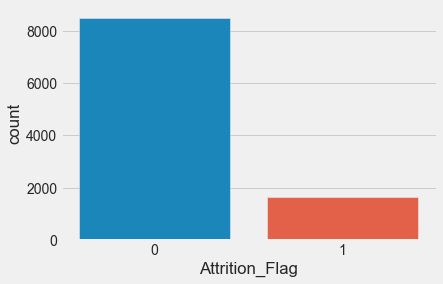

In [6]:
sns.countplot(data=data,  x=data['Attrition_Flag'])

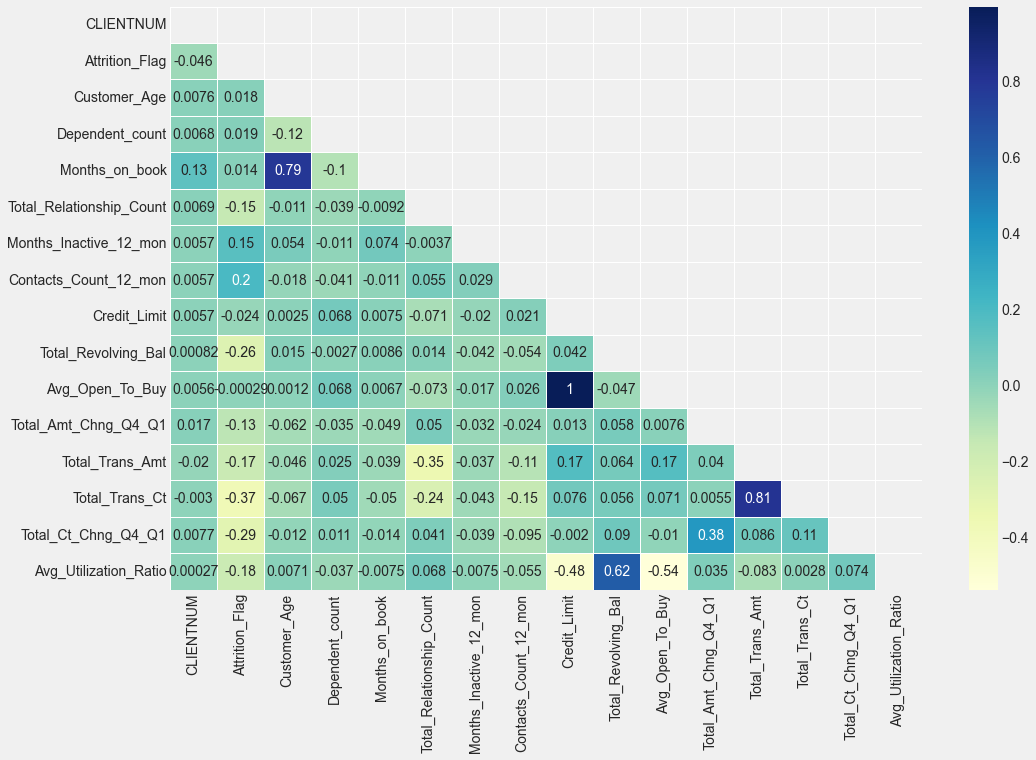

In [7]:
plt.figure(figsize=(15,10))

corr= data.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
datacorr=sns.heatmap(corr, annot=True,cmap="YlGnBu",linewidths=.5, mask=matrix)

In [8]:
data_dummies=data.copy()

In [9]:
data_dummies['Attrition_Flag']=data_dummies['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1])

In [10]:
data_dummies=pd.get_dummies(data_dummies)

In [11]:
data_dummies

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
10123,710638233,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10124,716506083,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
10125,717406983,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

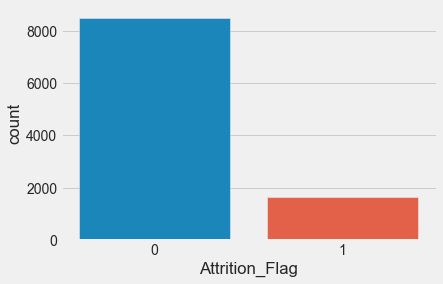

In [12]:
sns.countplot(data=data_dummies,  x=data_dummies['Attrition_Flag'])

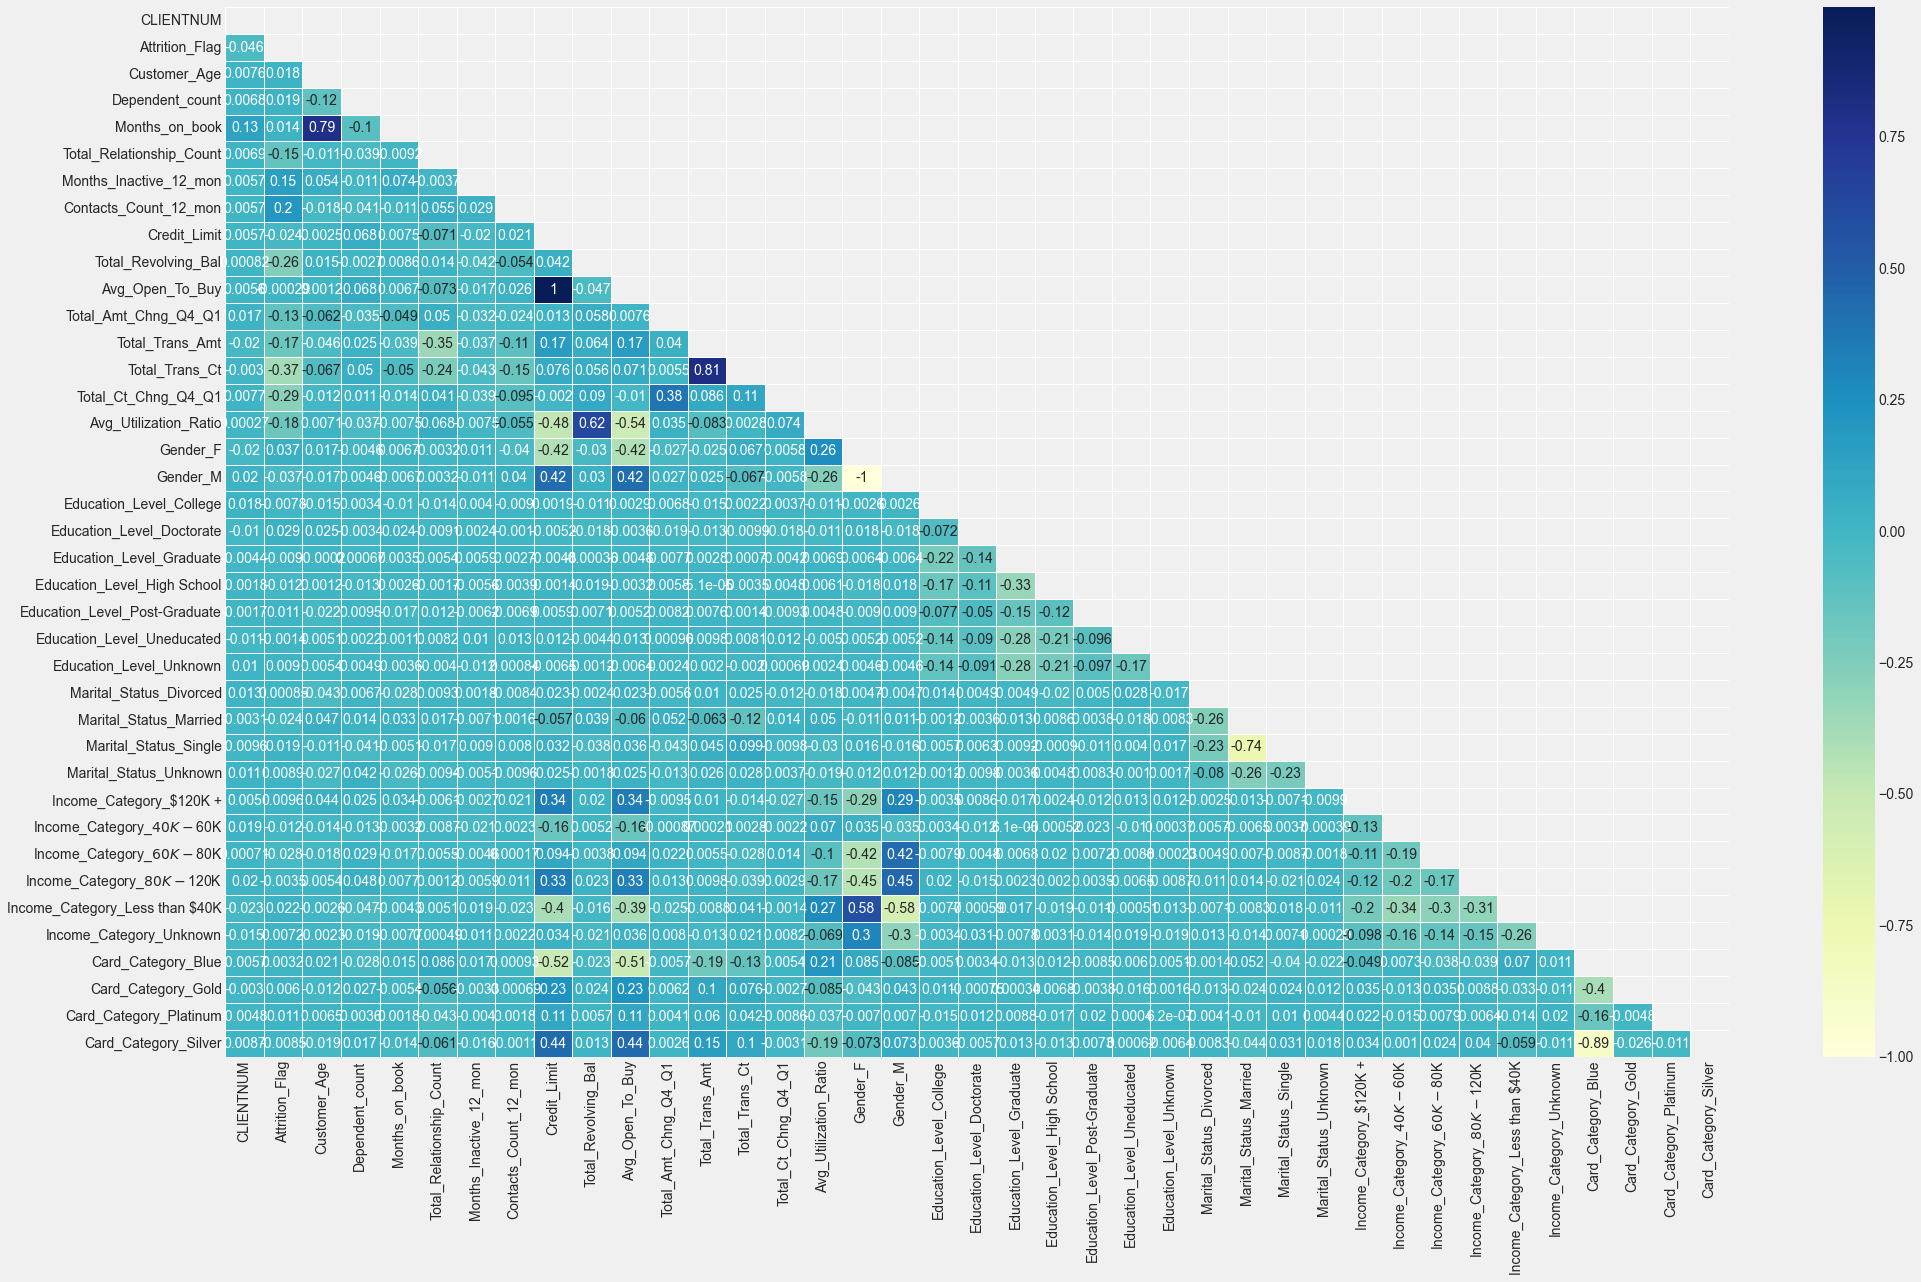

In [13]:
plt.figure(figsize=(30,18))

corr= data_dummies.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
# using the upper triangle matrix as mask 
datacorr_dum=sns.heatmap(corr, annot=True,cmap="YlGnBu",linewidths=.5, mask=matrix)

### lets see which scaling is better than the others

In [14]:
X_dummies= data_dummies.drop(['Attrition_Flag','CLIENTNUM'], axis=1)
y_dummies= data_dummies['Attrition_Flag']

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

scalers = [MinMaxScaler(), StandardScaler(), PowerTransformer()]
random_forest = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',n_estimators=200)

for scaler in scalers:
    Xs = scaler.fit_transform(X_dummies)
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,y_dummies,test_size=0.25,random_state=42,stratify=y_dummies)
    
    rf = random_forest.fit(Xs_train, ys_train)
    print('==================================================================')
    print('we test for overfitting our mondel camparing train and test scores')
    print('==================================================================')
    print(f'{scaler} Scaled RandomForest score for train set: %f' %rf.score(Xs_train, ys_train))
    print(f'{scaler} Scaled RandomForest score for test set: %f' %rf.score(Xs_test, ys_test))
    print('==================================================================')
    
    y_true, y_pred = ys_test, rf.predict(Xs_test)
    print(classification_report(y_true, y_pred))

we test for overfitting our mondel camparing train and test scores
MinMaxScaler() Scaled RandomForest score for train set: 1.000000
MinMaxScaler() Scaled RandomForest score for test set: 0.956951
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2125
           1       0.93      0.79      0.86       407

    accuracy                           0.96      2532
   macro avg       0.95      0.89      0.91      2532
weighted avg       0.96      0.96      0.96      2532

we test for overfitting our mondel camparing train and test scores
StandardScaler() Scaled RandomForest score for train set: 1.000000
StandardScaler() Scaled RandomForest score for test set: 0.957346
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2125
           1       0.93      0.80      0.86       407

    accuracy                           0.96      2532
   macro avg       0.94      0.89      0.92      2532
weigh

### we will choose PowerTransformer()

## lets se which features are more important

In [16]:
X_dummies= data_dummies.drop(['Attrition_Flag','CLIENTNUM'], axis=1)
y_dummies= data_dummies['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X_dummies,y_dummies,test_size=0.25,random_state=42,stratify=y_dummies)

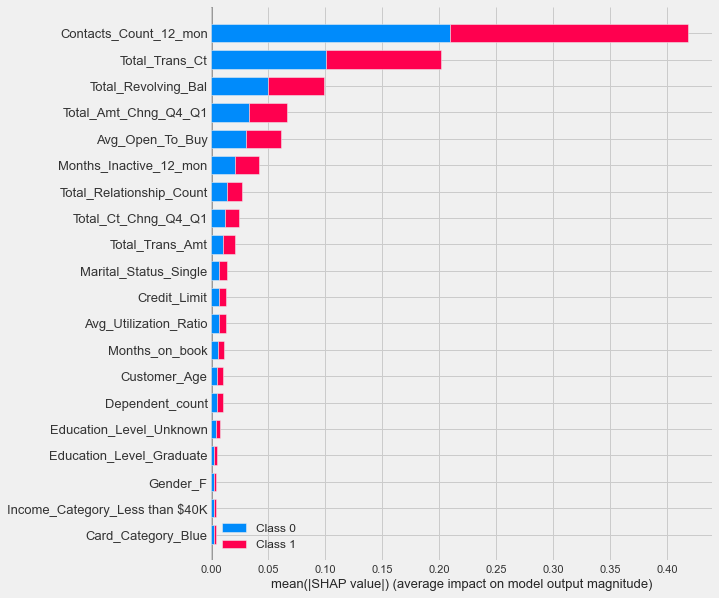

In [17]:
shap_values = shap.TreeExplainer(random_forest).shap_values(X_train, approximate=True)
shap.summary_plot(shap_values, X_train, plot_type="bar")

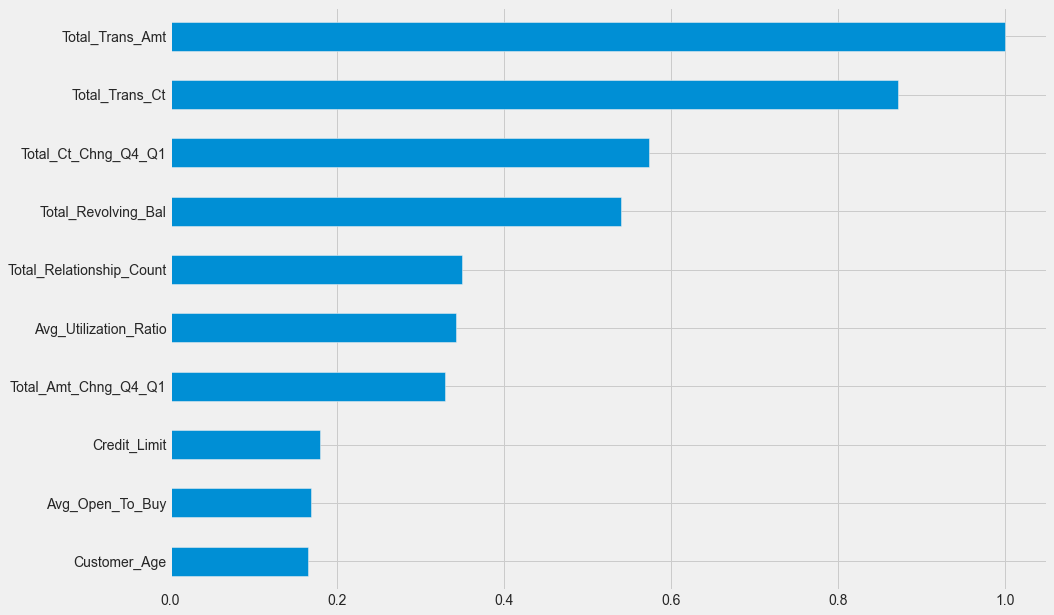

In [18]:
importance = pd.Series(random_forest.feature_importances_, index=list(X_dummies))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(10)
importance.sort_values().plot.barh(figsize=(14,10))
plt.show()

In [19]:
importance.index

Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Relationship_Count',
       'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Customer_Age'],
      dtype='object')

In [20]:
Ximportance = data_dummies[importance.index]
Ximportance

,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Avg_Open_To_Buy,Customer_Age
0,1144,42,1.625,777,5,0.061,1.335,12691.0,11914.0,45
1,1291,33,3.714,864,6,0.105,1.541,8256.0,7392.0,49
2,1887,20,2.333,0,4,0.000,2.594,3418.0,3418.0,51
3,1171,20,2.333,2517,3,0.760,1.405,3313.0,796.0,40
4,816,28,2.500,0,5,0.000,2.175,4716.0,4716.0,40
...,...,...,...,...,...,...,...,...,...,...
10122,15476,117,0.857,1851,3,0.462,0.703,4003.0,2152.0,50
10123,8764,69,0.683,2186,4,0.511,0.804,4277.0,2091.0,41
10124,10291,60,0.818,0,5,0.000,0.819,5409.0,5409.0,44
10125,8395,62,0.722,0,4,0.000,0.535,5281.0,5281.0,30


In [21]:
y_dummies

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [22]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    train = Dataframe.copy()
    
    X = Ximportance
    y = y_dummies
    
    #scaling
    scaler = preprocessing.PowerTransformer()
    x_scaled = scaler.fit_transform(X)
    x_scaled=pd.DataFrame(x_scaled)
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    print(f'StratifiedKFold and sf is: {sf}')
    print(sf.split(x_train, y_train))

    for train_index, test_index in sf.split(x_train, y_train):
#         print(train_index)
#         print(test_index)
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=8)
    print(f'our RandomizedSearchCV :rand_model is:{rand_model}')
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
        print(best_model)

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    print(f'final model with best estimator is :{final_model_sm}')
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(sf_x_test)

    #confusion matrix
    cf_matrix = confusion_matrix(sf_y_test , prediction)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['class 0:20 days','class 20:above days'])
    ax.yaxis.set_ticklabels(['class 0:20 days','class 20:above days'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    #classification_report
    print(classification_report(sf_y_test , prediction,target_names=['class 0:20 days', 'class 20:above days']))
    
    #create ROC curve
    fpr, tpr, _ = metrics.roc_curve(sf_y_test , prediction)
    auc = metrics.roc_auc_score(sf_y_test , prediction)

    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.title('ROC Plot')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
    
    Model = {}

    Model['Algorithm'] = Modelname
    Model['Model Score'] = str(round((accuracy_score(sf_y_test , prediction)*100),2)) + "%"
    Model['Precision'] = round(precision_score(sf_y_test , prediction),2)
    Model['Recall'] = round(recall_score(sf_y_test , prediction),2)
    Model['F1 score'] = round(f1_score(sf_y_test , prediction),2)
    Model['ROC-AUC score'] = round(roc_auc_score(sf_y_test , prediction),2)
    print(Model)
    return Model


In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]  #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto','sqrt']  #'sqrt'
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   #int(x) for x in np.linspace(10, 110, num = 11)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]  #10
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]  #4
# Method of selecting samples for training each tree
bootstrap = [True,False] #True
# Create the random grid
model_parameter_sm  = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

RandomForest
StratifiedKFold and sf is: StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x000001CCD9975B30>
our RandomizedSearchCV :rand_model is:RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})
RandomForestClassifier(max_depth=20, n_estimators=800)
RandomForest

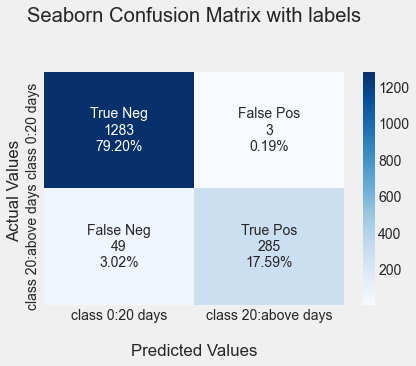

                     precision    recall  f1-score   support

    class 0:20 days       0.96      1.00      0.98      1286
class 20:above days       0.99      0.85      0.92       334

           accuracy                           0.97      1620
          macro avg       0.98      0.93      0.95      1620
       weighted avg       0.97      0.97      0.97      1620



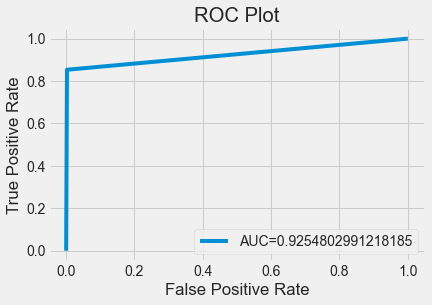

{'Algorithm': 'RandomForest', 'Model Score': '96.79%', 'Precision': 0.99, 'Recall': 0.85, 'F1 score': 0.92, 'ROC-AUC score': 0.93}


In [24]:
print("RandomForest")
TrainedModel = taining_without_feature_selection(model_parameter_sm, 
                                                 RandomForestClassifier(), 
                                                 data_dummies,
                                                 "RandomForest")

# I took perfect scores for our model! 

In [58]:
D={'Algorithm':['RandomForest'],'Model Score':[96.79],'Precision':[0.99],'Recall': [0.85],'F1 score':[0.92],'ROC-AUC score':[0.93]}

In [59]:
Dic=pd.DataFrame(D)
Dic

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,RandomForest,96.79,0.99,0.85,0.92,0.93
